In [1]:
#Primero importamos las librerías que vamos a usar
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

In [2]:
#Después importamos los datos del archivo CSV que tenemos
df_bmw = pd.read_csv("/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Entregables/Entregable_1_15ENE24/bmw_pricing_v3.csv")

In [3]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
#Una vez comprobado que el DataFrame carga bien, vamos a ver la estructura que tienen los datos.
df_bmw.info()

In [4]:
df_bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [9]:
#Vamos a buscar los nulos y a quitarlos de enmedio
df_bmw.isnull().sum()

marca                          0
modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
dtype: int64

In [6]:
#Y también eliminamos duplicados
df_bmw[df_bmw.duplicated(keep=False)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [7]:
df_bmw.drop_duplicates(inplace=True)

In [ ]:
df_bmw[df_bmw["marca"].isnull()]

In [8]:
for i in df_bmw:
    if df_bmw[i].isnull:
        df_bmw[i].fillna("Otros", inplace=True)
    else:
        df_bmw[i].fillna("0", inplace=True)
#Con este bucle for eliminamos los elementos nulos de las columnas que vaya encontrando el programa.

/var/folders/fg/y114z21j2zn039z19n0n8cdh0000gn/T/ipykernel_775/2661496558.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Otros' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_bmw[i].fillna("Otros", inplace=True)


In [10]:
#Ahora tenemos que buscar las variables únicas para poder trabajar con ellas, para ello vamos a hacer un análisis univariable
for i in df_bmw.columns:
    print("\n", df_bmw[i].unique(), "\n")


 ['Otros' 'BMW'] 


 ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' 'i8' '630' '430 Gran Coupé' '635' '520'
 'Otros' '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3'
 'M550' '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé'
 'i3' '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' ' Active Tourer'
 '225 Active Tourer' '214 Gran Tourer'] 


 [140411.0 13929.0 183297.0 ... 19633.0 27920.0 195840.0] 


 [100.0 317.0 120.0 135.0 160.0 225.0 145.0 105.0 125.0 130.0 270.0 110.0
 140.0 180.0 85.0 190.0 236.0 240.0 250.0 230.0 309.0 170.0 142.0 155.0
 210.0 'Otros' 122.0 2

In [11]:
for i in df_bmw.columns:
    print("\n", i, df_bmw[i].value_counts, "\n")


 marca <bound method IndexOpsMixin.value_counts of 0       Otros
1         BMW
2         BMW
3         BMW
4         BMW
        ...  
4838      BMW
4839      BMW
4840      BMW
4841      BMW
4842      BMW
Name: marca, Length: 4843, dtype: object> 


 modelo <bound method IndexOpsMixin.value_counts of 0                     118
1                      M4
2                     320
3                     420
4                     425
              ...        
4838      218 Gran Tourer
4839    218 Active Tourer
4840      218 Gran Tourer
4841    218 Active Tourer
4842                  525
Name: modelo, Length: 4843, dtype: object> 


 km <bound method IndexOpsMixin.value_counts of 0       140411.0
1        13929.0
2       183297.0
3       128035.0
4        97097.0
          ...   
4838     39743.0
4839     49832.0
4840     19633.0
4841     27920.0
4842    195840.0
Name: km, Length: 4843, dtype: object> 


 potencia <bound method IndexOpsMixin.value_counts of 0       100.0
1       317.0
2     

In [12]:
#Ahora separamos las variables en Target, Categórica, Booleanas y Numéricas
df_bmw.info()
df_bmw2 = df_bmw.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   marca                        4843 non-null   object
 1   modelo                       4843 non-null   object
 2   km                           4843 non-null   object
 3   potencia                     4843 non-null   object
 4   fecha_registro               4843 non-null   object
 5   tipo_gasolina                4843 non-null   object
 6   color                        4843 non-null   object
 7   tipo_coche                   4843 non-null   object
 8   volante_regulable            4843 non-null   object
 9   aire_acondicionado           4843 non-null   object
 10  camara_trasera               4843 non-null   object
 11  asientos_traseros_plegables  4843 non-null   object
 12  elevalunas_electrico         4843 non-null   object
 13  bluetooth                    4843

<Axes: >

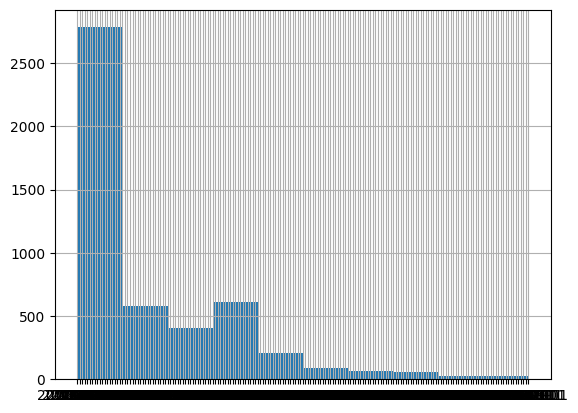

In [13]:
df_bmw2["fecha_registro"].hist()

In [18]:
target = ["precio"]
def lista_variables(dataset):
    lista_categorica=[]
    lista_booleana=[]
    lista_numerica=[]
    for i in dataset:
        if (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique()) != 2 and i not in target:
            lista_numerica.append(i)
        elif (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and i not in target:
            lista_boolean.append(i)
        elif (dataset[i].dtype.kind=="O") and i not in target:
            lista_categorica.append(i)

    return lista_categorica, lista_booleana, lista_numerica

SyntaxError: invalid syntax (1084326781.py, line 9)

In [16]:
lista_categorica, lista_booleana, lista_numerica = lista_variables(df_bmw2)

In [17]:
lista_categorica

['marca',
 'modelo',
 'km',
 'potencia',
 'fecha_registro',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad',
 'fecha_venta']